**Global Solutions - Grupo BlueGather:**
- RM: 97068 - Gustavo Sorrilha Sanches
- RM: 96466 - Kaue Caponero Figueiredo
- RM: 97503 - Mariana Santos Fernandes de Sousa
- RM: 97324 - Natan Cruz
- RM: 97092 - Vitor Rubim Passos

**Desafio 01:**

**Detecção e Classificação de Espécies:**

Utilizar técnicas de Deep Learning para identificar e classificar espécies marinhas em imagens subaquáticas ou superficiais. O objetivo é desenvolver um modelo que possa distinguir entre diferentes espécies, ajudando a monitorar a biodiversidade e detectar espécies ameaçadoras, invasoras, poluidores ou corrosão dos corais entre outros habitats.

In [ ]:
# Importando Bibliotecas
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
from google.colab import files

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Importar o arquivo 'kaggle.json' nos ficheiros do Collab para acesso a API
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kauecaponero","key":"f3171fdfa548971bcbf8cd0bc263f286"}'}

In [ ]:
# Configuração do Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download do conjunto de dados do Kaggle
!kaggle datasets download -d crowww/a-large-scale-fish-dataset
!unzip a-large-scale-fish-dataset.zip -d fish_data

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: fish_data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: fish_data/Fish_Dataset/Fish_

In [ ]:
# Configuração dos geradores de dados para treinamento e validação com aumento de dados
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,             # Redimensiona os valores dos pixels para [0, 1]
    validation_split=0.2,       # Define 20% dos dados como validação
    rotation_range=20,          # Rotação aleatória de imagens em 20 graus
    width_shift_range=0.2,      # Translação horizontal aleatória de 20% do total
    height_shift_range=0.2,     # Translação vertical aleatória de 20% do total
    shear_range=0.2,            # Cisalhamento aleatório
    zoom_range=0.2,             # Zoom aleatório
    horizontal_flip=True,       # Inversão horizontal aleatória
    fill_mode='nearest'         # Preenchimento dos pixels vazios com o valor mais próximo
)

# Definição do gerador de dados de treinamento
train_generator = datagen.flow_from_directory(
    'fish_data/Fish_Dataset/Fish_Dataset',
    target_size=(224, 224),     # Redimensiona as imagens para 224x224
    batch_size=32,              # Define o tamanho do lote
    class_mode='categorical',   # Define o modo de classificação como categórico
    subset='training'           # Define este gerador como treinamento
)

# Definição do gerador de dados de validação
validation_generator = datagen.flow_from_directory(
    'fish_data/Fish_Dataset/Fish_Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


In [ ]:
# Utilizando MobileNetV2 para Transfer Learning
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',         # Utiliza os pesos pré-treinados no ImageNet
    include_top=False,          # Exclui a camada de classificação final
    input_shape=(224, 224, 3)   # Define o formato da entrada
)

# Congelando as camadas do modelo base para evitar atualização durante o treinamento inicial
base_model.trainable = False

# Criação do modelo de Deep Learning
model = tf.keras.Sequential([
    base_model,                         # Modelo base MobileNetV2
    tf.keras.layers.GlobalAveragePooling2D(),  # Camada de pooling global
    tf.keras.layers.Dense(512, activation='relu'), # Camada totalmente conectada
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax') # Camada de saída com ativação softmax
])

# Compilação do modelo com otimizador Adam e função de perda de entropia cruzada categórica
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 1s 0us/step


Epoch 1/5
450/450 [==============================] - 315s 676ms/step - loss: 0.5853 - accuracy: 0.7810 - val_loss: 0.2723 - val_accuracy: 0.9028
Epoch 2/5
450/450 [==============================] - 289s 642ms/step - loss: 0.4120 - accuracy: 0.8365 - val_loss: 0.5200 - val_accuracy: 0.8517
Epoch 3/5
450/450 [==============================] - 287s 638ms/step - loss: 0.3581 - accuracy: 0.8564 - val_loss: 0.1813 - val_accuracy: 0.9375
Epoch 4/5
450/450 [==============================] - 287s 638ms/step - loss: 0.3387 - accuracy: 0.8630 - val_loss: 0.2456 - val_accuracy: 0.9228
Epoch 5/5
450/450 [==============================] - 289s 642ms/step - loss: 0.3209 - accuracy: 0.8742 - val_loss: 0.2059 - val_accuracy: 0.9406


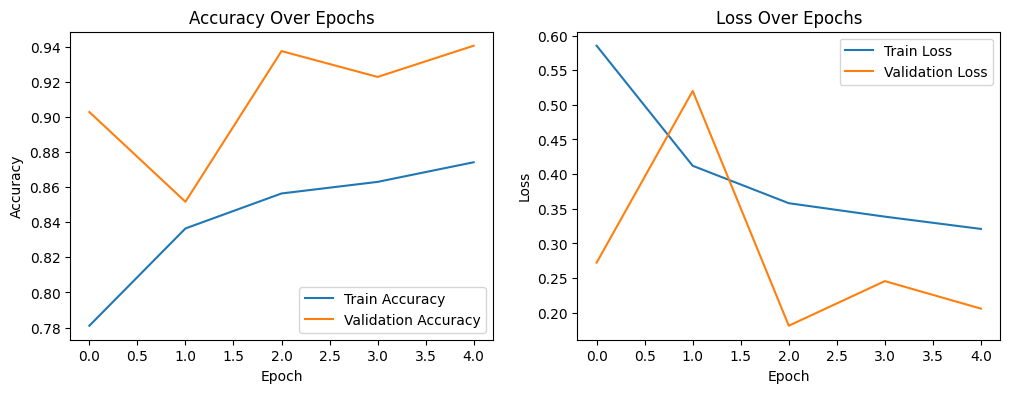

In [ ]:
# Treinamento inicial do modelo
history = model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Visualização dos Resultados
plt.figure(figsize=(12, 4))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

Epoch 1/5
450/450 [==============================] - 296s 640ms/step - loss: 0.5144 - accuracy: 0.8106 - val_loss: 0.1869 - val_accuracy: 0.9436
Epoch 2/5
450/450 [==============================] - 306s 680ms/step - loss: 0.3552 - accuracy: 0.8622 - val_loss: 0.1674 - val_accuracy: 0.9514
Epoch 3/5
450/450 [==============================] - 287s 639ms/step - loss: 0.3070 - accuracy: 0.8819 - val_loss: 0.1525 - val_accuracy: 0.9506
Epoch 4/5
450/450 [==============================] - 287s 639ms/step - loss: 0.2862 - accuracy: 0.8887 - val_loss: 0.1398 - val_accuracy: 0.9544
Epoch 5/5
450/450 [==============================] - 289s 642ms/step - loss: 0.2741 - accuracy: 0.8962 - val_loss: 0.1567 - val_accuracy: 0.9508


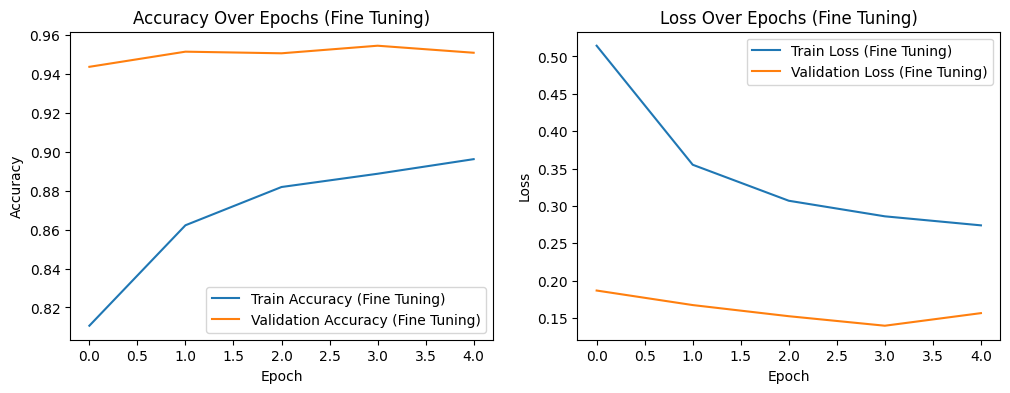

In [ ]:
# Descongelando as últimas camadas do MobileNetV2 para ajuste fino
base_model.trainable = True

# Descongelando as últimas 20 camadas
fine_tune_at = len(base_model.layers) - 20

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilação do modelo com uma taxa de aprendizado menor para ajuste fino
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento adicional do modelo com ajuste fino
history_fine = model.fit(train_generator, validation_data=validation_generator, epochs=5)

# Visualização dos Resultados do Ajuste Fino
plt.figure(figsize=(12, 4))

# Gráfico de Acurácia
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train Accuracy (Fine Tuning)')
plt.plot(history_fine.history['val_accuracy'], label='Validation Accuracy (Fine Tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs (Fine Tuning)')

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train Loss (Fine Tuning)')
plt.plot(history_fine.history['val_loss'], label='Validation Loss (Fine Tuning)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs (Fine Tuning)')

plt.show()

In [ ]:
# Função para plotar matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

113/113 [==============================] - 70s 614ms/step
Classification Report
                    precision    recall  f1-score   support

   Black Sea Sprat       0.11      0.12      0.11       400
   Gilt-Head Bream       0.13      0.13      0.13       400
   Hourse Mackerel       0.12      0.10      0.11       400
        Red Mullet       0.10      0.11      0.11       400
     Red Sea Bream       0.11      0.11      0.11       400
          Sea Bass       0.11      0.12      0.11       400
            Shrimp       0.11      0.12      0.11       400
Striped Red Mullet       0.09      0.09      0.09       400
             Trout       0.13      0.13      0.13       400

          accuracy                           0.11      3600
         macro avg       0.11      0.11      0.11      3600
      weighted avg       0.11      0.11      0.11      3600

Confusion Matrix


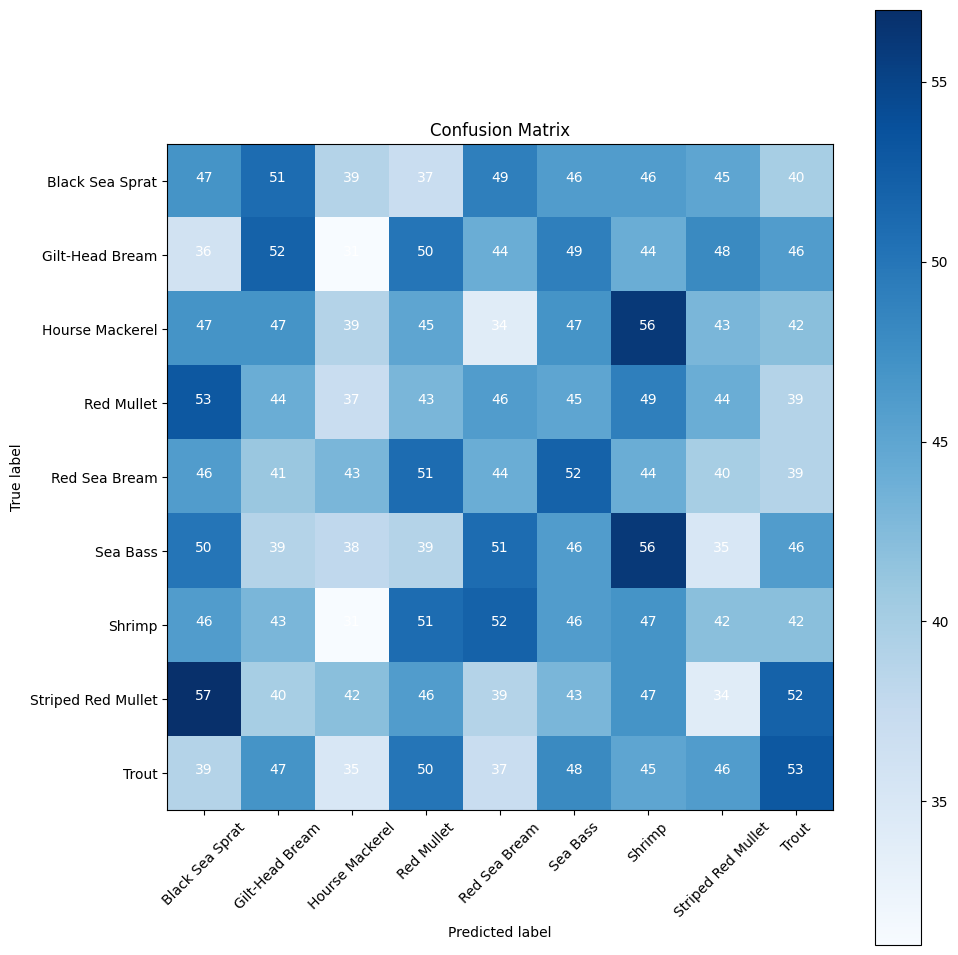

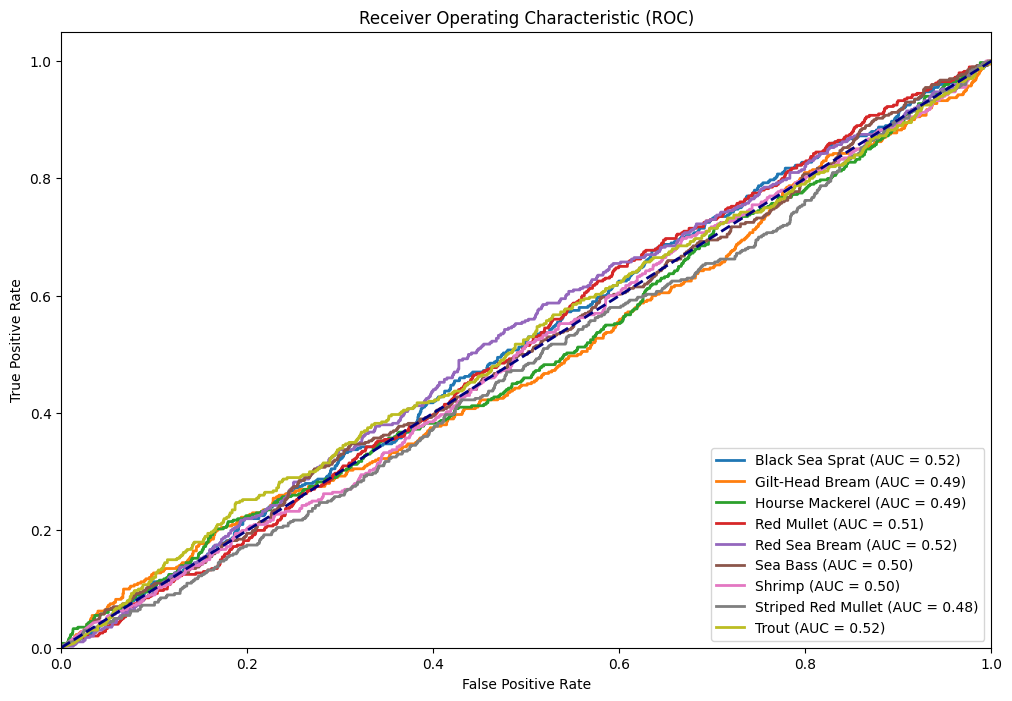

In [ ]:
# Avaliação do modelo no conjunto de validação
val_loss, val_accuracy = model.evaluate(validation_generator)

# Previsões no conjunto de validação
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Relatório de Classificação
true_classes = validation_generator.classes
print('Classification Report')
print(classification_report(true_classes, y_pred, target_names=list(validation_generator.class_indices.keys())))

# Matriz de Confusão
print('Confusion Matrix')
cm = confusion_matrix(true_classes, y_pred)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cm, classes=list(validation_generator.class_indices.keys()), title='Confusion Matrix')
plt.show()

# Curvas ROC e AUC
fpr = {}
tpr = {}
roc_auc = {}

for i, class_name in enumerate(validation_generator.class_indices.keys()):
    fpr[class_name], tpr[class_name], _ = roc_curve(true_classes == i, Y_pred[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

plt.figure(figsize=(12, 8))
for class_name in validation_generator.class_indices.keys():
    plt.plot(fpr[class_name], tpr[class_name], lw=2, label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
